In [25]:
#Importing necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [6]:
# Reading the dataset
HCHO_data = pd.read_csv('Cleaned_HCHO_Data.csv')

In [7]:
# Dataset Head
HCHO_data.head()

,HCHO Reading,Location,Current Date,Next Date
0,0.000197,Colombo Proper,2019-01-01,2019-01-02
1,0.000263,Colombo Proper,2019-01-02,2019-01-03
2,0.000099,Colombo Proper,2019-01-03,2019-01-04
3,0.000210,Colombo Proper,2019-01-04,2019-01-05
4,0.000179,Colombo Proper,2019-01-05,2019-01-06


# Seasonal Trends in the Dataframe

### HCHO air changes over past years

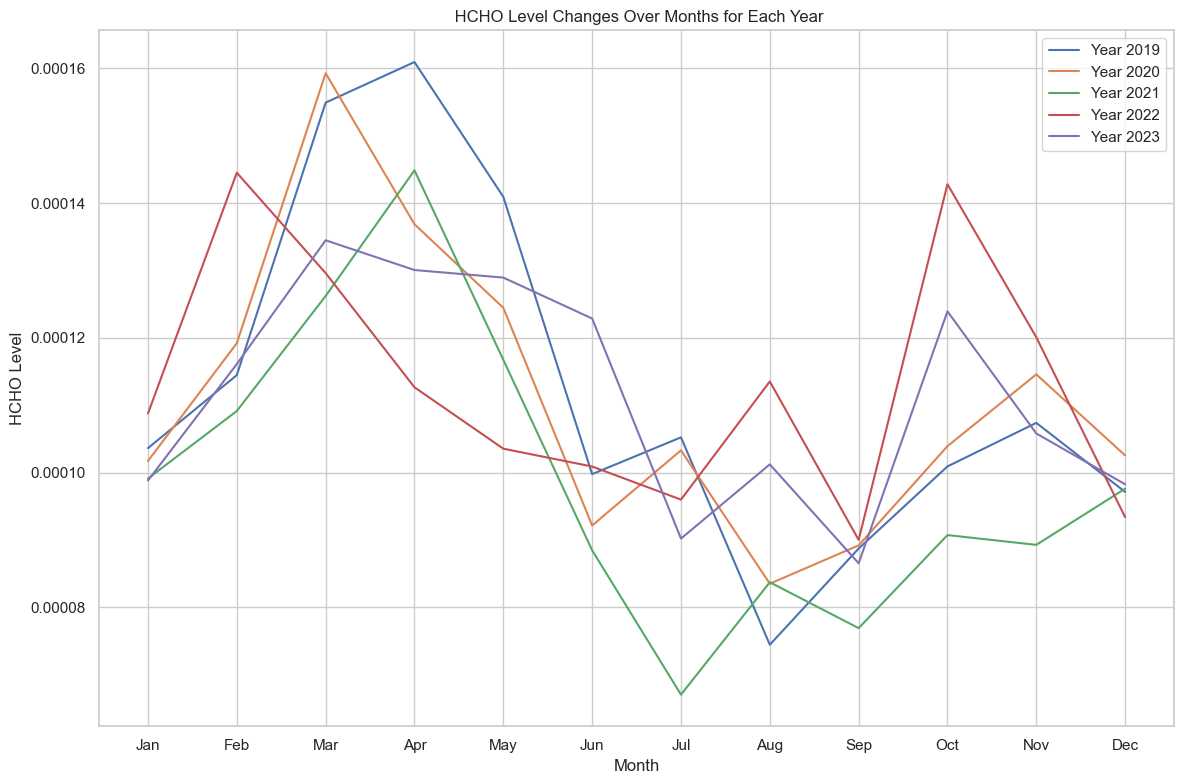

In [8]:
# Extract year and month from the Date column
HCHO_data['Year'] = pd.to_datetime(HCHO_data['Current Date']).dt.year
HCHO_data['Month'] = pd.to_datetime(HCHO_data['Current Date']).dt.month

# Group data by year and month and calculate mean HCHO level
monthly_mean_hcho = HCHO_data.groupby(['Year', 'Month'])['HCHO Reading'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Loop through each year and plot HCHO levels over months
for year in monthly_mean_hcho['Year'].unique():
    data_year = monthly_mean_hcho[monthly_mean_hcho['Year'] == year]
    plt.plot(data_year['Month'], data_year['HCHO Reading'], label=f'Year {year}')

plt.xlabel('Month')
plt.ylabel('HCHO Level')
plt.title(' HCHO Level Changes Over Months for Each Year')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.tight_layout()
plt.show()


well when comapring HCHO Level varies over the months in every year we can see in every year the months between june - september HCHO levels are gradually lower. and also in the months of march to may they are comparetively higher. This HCHO air pollution can increased due to several reasons. Let's check some of the reasons that may affect HCHO air level.

1. Fuel-Burning Appliances
2. Vehicle Emissions
3. Tobacco Smoke
4. Carpenting
5. Fabrics
6. Building Materials

##  Weather Seasons in Sri Lanka

In Comparision to Weather of Sri Lanka. There are mainly 2 Seasons and one inter-monsol period.

1. Southwest Monsoon (Yala): This monsoon typically occurs from May to September, bringing heavy rain to the southwestern regions of the country.
2. Northeast Monsoon (Maha): Running from October to January, the northeast monsoon predominantly affects the eastern and northern regions of Sri Lanka. These regions experience their primary rainy season.
3. Inter-monsoonal Periods: These occur from March to April and from September to October. During these transitional periods, the weather can be less predictable, with intermittent showers and occasional thunderstorms.

Now based on these two seasons we can see that from month May to September the HCHO Levels take a lower ammount and from September to April, May the HCHO Levels are higher. One of the reasons for that can be this two main seasons in Sri Lanka. Now Let's See how these seasons effects the HCHO Level in the country.

Let's Consider Year by Year to build a hypothesis.

### Year 2019 Weather Seasons 

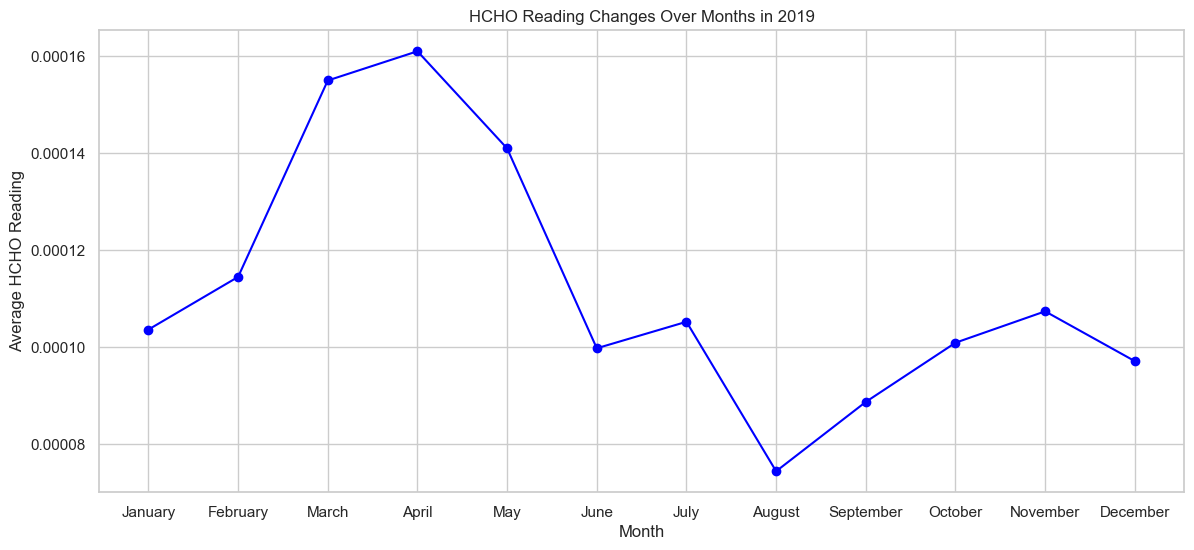

In [61]:
# Data Distribution of the HCHO Levels in the year 2019
# Filter the data for the year 2019
HCHO_2019 = HCHO_data[HCHO_data['Year'] == 2019]

# Group the data by month and calculate the mean HCHO reading for each month
monthly_means = HCHO_2019.groupby('Month')['HCHO Reading'].mean()

# Plot the HCHO readings over months
plt.figure(figsize=(14, 6))
monthly_means.plot(marker='o', color='blue')
plt.title('HCHO Reading Changes Over Months in 2019')
plt.xlabel('Month')
plt.ylabel('Average HCHO Reading')
plt.xticks(range(1, 13), [calendar.month_name[i] for i in range(1, 13)]) 
plt.grid(True)
plt.show()

In year 2019 we can see that from month February to June Higher HCHO Levels are showed. These higher levels in inter-monsoonal period. which is march - april. well its one factor that needed to be remembered when considering the HCHO Levels. Lets give a summary of HCHO Readings in Seasons.

In [52]:
HCHO_2019.head()

,HCHO Reading,Location,Current Date,Next Date,Year,Month
0,0.000197,Colombo Proper,2019-01-01,2019-01-02,2019,1
1,0.000263,Colombo Proper,2019-01-02,2019-01-03,2019,1
2,0.000099,Colombo Proper,2019-01-03,2019-01-04,2019,1
3,0.000210,Colombo Proper,2019-01-04,2019-01-05,2019,1
4,0.000179,Colombo Proper,2019-01-05,2019-01-06,2019,1


In [57]:
# Sumamary of HCHO Levels in the weather Seasons
Southwest_monsoon = [5,6,7,8] # months numbers
Northeast_monsoon = [10,11,12,1]
Inter_monsoonal_period = [3,4,9]

# Filter the data for each weather season
southwest_monsoon_data_2019 = HCHO_2019[HCHO_2019['Month'].isin(Southwest_monsoon)]
northeast_monsoon_data_2019 = HCHO_2019[HCHO_2019['Month'].isin(Northeast_monsoon)]
inter_monsoonal_data_2019 = HCHO_2019[HCHO_2019['Month'].isin(Inter_monsoonal_period)]

# Calculate the average HCHO levels for each season
southwest_monsoon_avg_2019 = southwest_monsoon_data_2019['HCHO Reading'].mean()
northeast_monsoon_avg_2019 = northeast_monsoon_data_2019['HCHO Reading'].mean()
inter_monsoonal_avg_2019 = inter_monsoonal_data_2019['HCHO Reading'].mean()

print("Average HCHO levels in Southwest Monsoon:", southwest_monsoon_avg_2019)
print("Average HCHO levels in Northeast Monsoon:", northeast_monsoon_avg_2019)
print("Average HCHO levels in Inter-Monsoonal Period:", inter_monsoonal_avg_2019)


Average HCHO levels in Southwest Monsoon: 0.00010520568021477011
Average HCHO levels in Northeast Monsoon: 0.00010224879267291063
Average HCHO levels in Inter-Monsoonal Period: 0.00013477159601114812


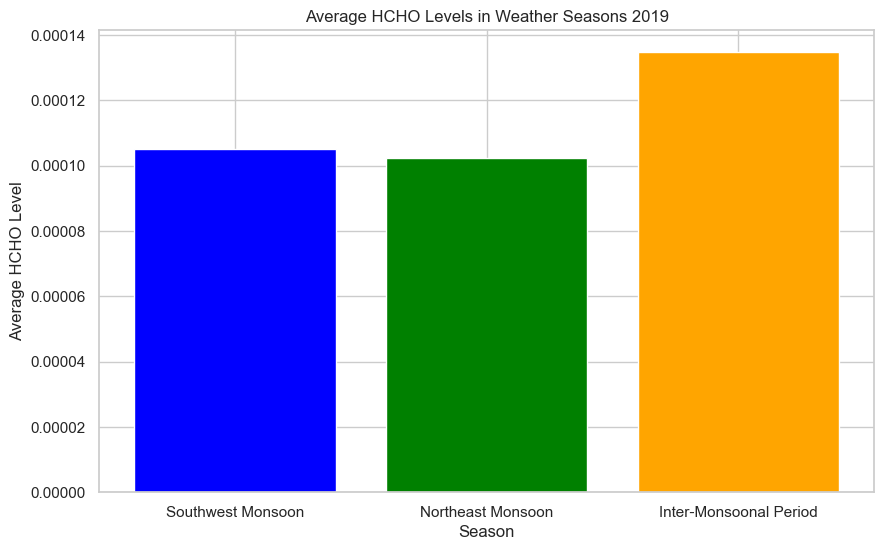

In [58]:
#Plot the average HCHO levels for each season
seasons = ['Southwest Monsoon', 'Northeast Monsoon', 'Inter-Monsoonal Period']
avg_levels = [southwest_monsoon_avg_2019, northeast_monsoon_avg_2019, inter_monsoonal_avg_2019]

plt.figure(figsize=(10, 6))
plt.bar(seasons, avg_levels, color=['blue', 'green', 'orange'])
plt.title('Average HCHO Levels in Weather Seasons 2019')
plt.xlabel('Season')
plt.ylabel('Average HCHO Level')
plt.show()

### Year 2020 Weather Seasons

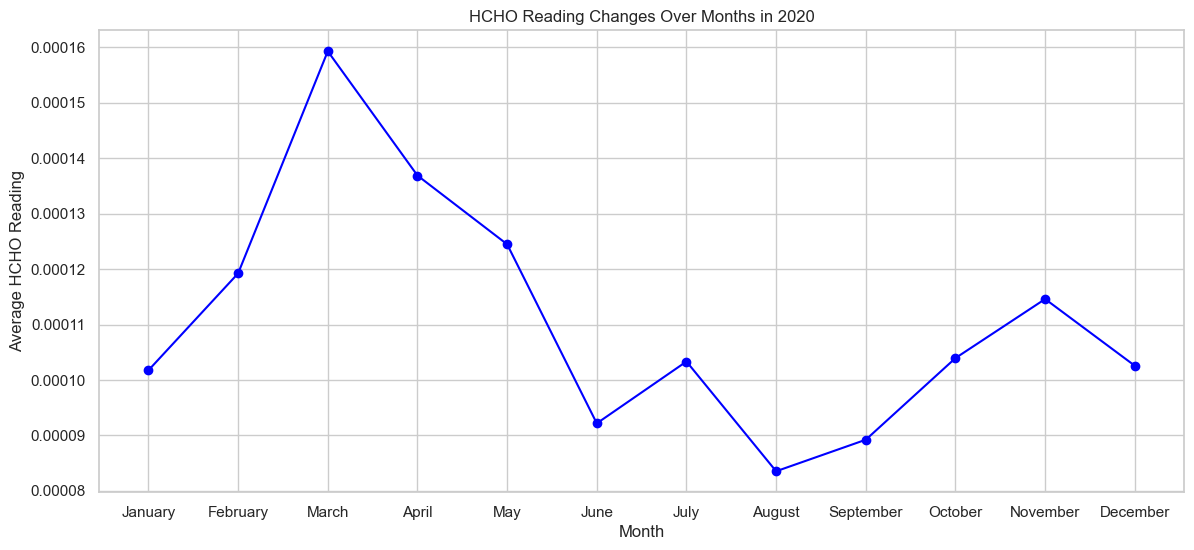

In [67]:
# Data Distribution of the HCHO Levels in the year 2020
# Filter the data for the year 2020
HCHO_2020 = HCHO_data[HCHO_data['Year'] == 2020]

# Group the data by month and calculate the mean HCHO reading for each month
monthly_means = HCHO_2020.groupby('Month')['HCHO Reading'].mean()

# Plot the HCHO readings over months
plt.figure(figsize=(14, 6))
monthly_means.plot(marker='o', color='blue')
plt.title('HCHO Reading Changes Over Months in 2020')
plt.xlabel('Month')
plt.ylabel('Average HCHO Reading')
plt.xticks(range(1, 13), [calendar.month_name[i] for i in range(1, 13)]) 
plt.show()

Again in the month of February to April there is a slight increasing the HCHO Levels. From April to August its decreasing. Let's summarise the HCHO levels in this Year too.

In [68]:
# Filter the data for each weather season
southwest_monsoon_data_2020 = HCHO_2020[HCHO_2020['Month'].isin(Southwest_monsoon)]
northeast_monsoon_data_2020 = HCHO_2020[HCHO_2020['Month'].isin(Northeast_monsoon)]
inter_monsoonal_data_2020 = HCHO_2020[HCHO_2020['Month'].isin(Inter_monsoonal_period)]

# Calculate the average HCHO levels for each season
southwest_monsoon_avg_2020 = southwest_monsoon_data_2020['HCHO Reading'].mean()
northeast_monsoon_avg_2020 = northeast_monsoon_data_2020['HCHO Reading'].mean()
inter_monsoonal_avg_2020 = inter_monsoonal_data_2020['HCHO Reading'].mean()

print("Average HCHO levels in Southwest Monsoon:", southwest_monsoon_avg_2020)
print("Average HCHO levels in Northeast Monsoon:", northeast_monsoon_avg_2020)
print("Average HCHO levels in Inter-Monsoonal Period:", inter_monsoonal_avg_2020)

Average HCHO levels in Southwest Monsoon: 0.00010073195916207954
Average HCHO levels in Northeast Monsoon: 0.00010570165284173087
Average HCHO levels in Inter-Monsoonal Period: 0.00012832307276960792


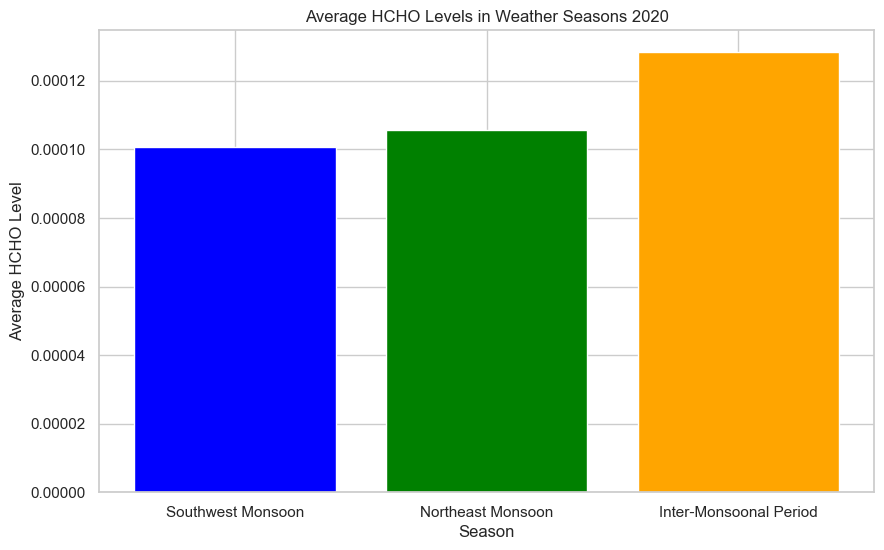

In [69]:
#Plot the average HCHO levels for each season
seasons = ['Southwest Monsoon', 'Northeast Monsoon', 'Inter-Monsoonal Period']
avg_levels = [southwest_monsoon_avg_2020, northeast_monsoon_avg_2020, inter_monsoonal_avg_2020]

plt.figure(figsize=(10, 6))
plt.bar(seasons, avg_levels, color=['blue', 'green', 'orange'])
plt.title('Average HCHO Levels in Weather Seasons 2020')
plt.xlabel('Season')
plt.ylabel('Average HCHO Level')
plt.show()

### Year 2021 Weather Seasons

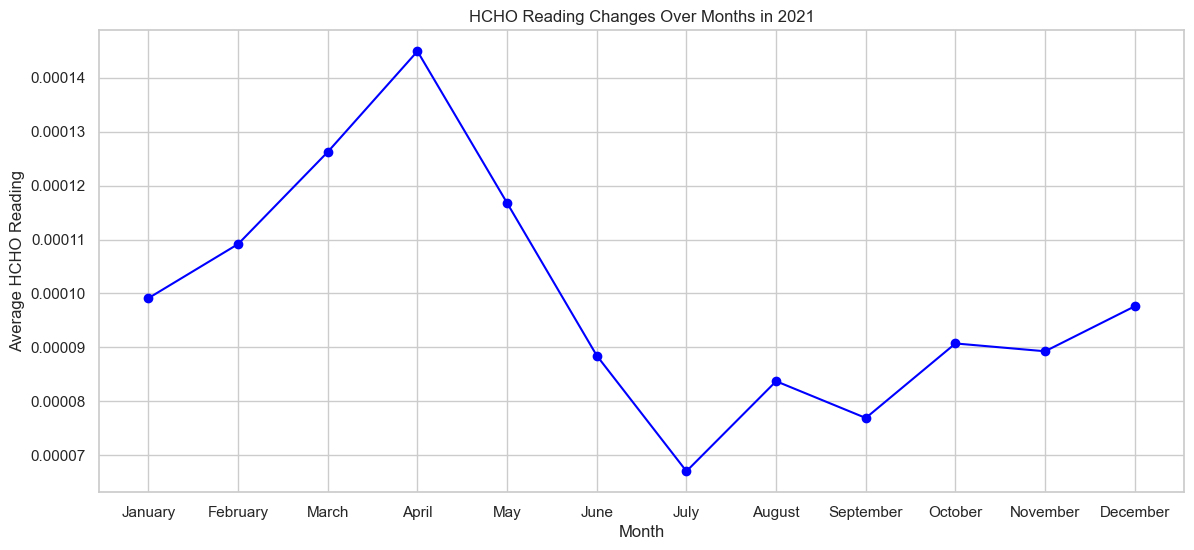

In [70]:
# Data Distribution of the HCHO Levels in the year 2021
# Filter the data for the year 2021
HCHO_2021 = HCHO_data[HCHO_data['Year'] == 2021]

# Group the data by month and calculate the mean HCHO reading for each month
monthly_means = HCHO_2021.groupby('Month')['HCHO Reading'].mean()

# Plot the HCHO readings over months
plt.figure(figsize=(14, 6))
monthly_means.plot(marker='o', color='blue')
plt.title('HCHO Reading Changes Over Months in 2021')
plt.xlabel('Month')
plt.ylabel('Average HCHO Reading')
plt.xticks(range(1, 13), [calendar.month_name[i] for i in range(1, 13)]) 
plt.show()

In this year there is a gradual increase within january - april and peak in april and it decreases.

In [71]:
# Filter the data for each weather season
southwest_monsoon_data_2021 = HCHO_2021[HCHO_2021['Month'].isin(Southwest_monsoon)]
northeast_monsoon_data_2021 = HCHO_2021[HCHO_2021['Month'].isin(Northeast_monsoon)]
inter_monsoonal_data_2021 = HCHO_2021[HCHO_2021['Month'].isin(Inter_monsoonal_period)]

# Calculate the average HCHO levels for each season
southwest_monsoon_avg_2021 = southwest_monsoon_data_2021['HCHO Reading'].mean()
northeast_monsoon_avg_2021 = northeast_monsoon_data_2021['HCHO Reading'].mean()
inter_monsoonal_avg_2021 = inter_monsoonal_data_2021['HCHO Reading'].mean()

print("Average HCHO levels in Southwest Monsoon:", southwest_monsoon_avg_2021)
print("Average HCHO levels in Northeast Monsoon:", northeast_monsoon_avg_2021)
print("Average HCHO levels in Inter-Monsoonal Period:", inter_monsoonal_avg_2021)

Average HCHO levels in Southwest Monsoon: 8.873693725097518e-05
Average HCHO levels in Northeast Monsoon: 9.423937604867064e-05
Average HCHO levels in Inter-Monsoonal Period: 0.00011615001817215642


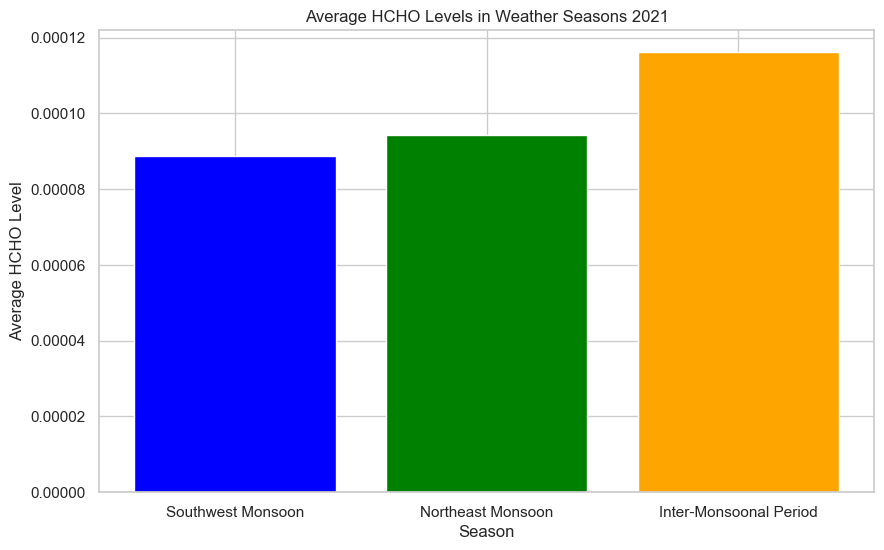

In [72]:
#Plot the average HCHO levels for each season
seasons = ['Southwest Monsoon', 'Northeast Monsoon', 'Inter-Monsoonal Period']
avg_levels = [southwest_monsoon_avg_2021, northeast_monsoon_avg_2021, inter_monsoonal_avg_2021]

plt.figure(figsize=(10, 6))
plt.bar(seasons, avg_levels, color=['blue', 'green', 'orange'])
plt.title('Average HCHO Levels in Weather Seasons 2021')
plt.xlabel('Season')
plt.ylabel('Average HCHO Level')
plt.show()

### Year 2022 Weather Seasons

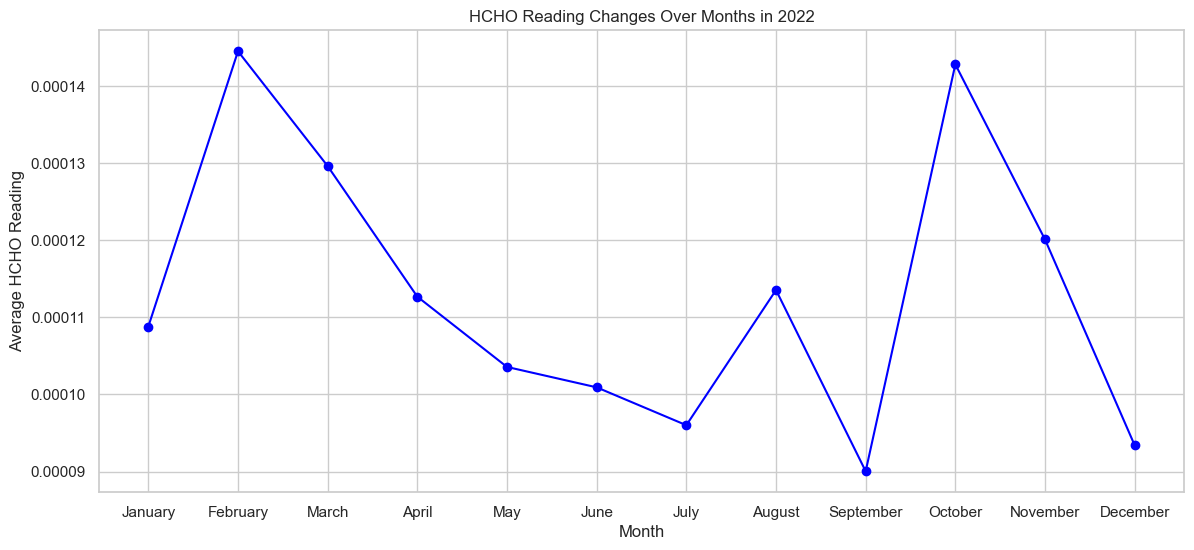

In [75]:
# Data Distribution of the HCHO Levels in the year 2022
# Filter the data for the year 2021
HCHO_2022 = HCHO_data[HCHO_data['Year'] == 2022]

# Group the data by month and calculate the mean HCHO reading for each month
monthly_means = HCHO_2022.groupby('Month')['HCHO Reading'].mean()

# Plot the HCHO readings over months
plt.figure(figsize=(14, 6))
monthly_means.plot(marker='o', color='blue')
plt.title('HCHO Reading Changes Over Months in 2022')
plt.xlabel('Month')
plt.ylabel('Average HCHO Reading')
plt.xticks(range(1, 13), [calendar.month_name[i] for i in range(1, 13)]) 
plt.show()

In 2022 also HCHO Level peaks in February and getting gradually lower within march - july. The interesting point is HCHO level again peaks in the October month which is kinda unfamilliar within previous years.

In [77]:
# Filter the data for each weather season
southwest_monsoon_data_2022 = HCHO_2022[HCHO_2022['Month'].isin(Southwest_monsoon)]
northeast_monsoon_data_2022 = HCHO_2022[HCHO_2022['Month'].isin(Northeast_monsoon)]
inter_monsoonal_data_2022 = HCHO_2022[HCHO_2022['Month'].isin(Inter_monsoonal_period)]

# Calculate the average HCHO levels for each season
southwest_monsoon_avg_2022 = southwest_monsoon_data_2022['HCHO Reading'].mean()
northeast_monsoon_avg_2022 = northeast_monsoon_data_2022['HCHO Reading'].mean()
inter_monsoonal_avg_2022 = inter_monsoonal_data_2022['HCHO Reading'].mean()

print("Average HCHO levels in Southwest Monsoon:", southwest_monsoon_avg_2022)
print("Average HCHO levels in Northeast Monsoon:", northeast_monsoon_avg_2022)
print("Average HCHO levels in Inter-Monsoonal Period:", inter_monsoonal_avg_2022)

Average HCHO levels in Southwest Monsoon: 0.0001035147713782886
Average HCHO levels in Northeast Monsoon: 0.00011640167470851234
Average HCHO levels in Inter-Monsoonal Period: 0.00011105000493455717


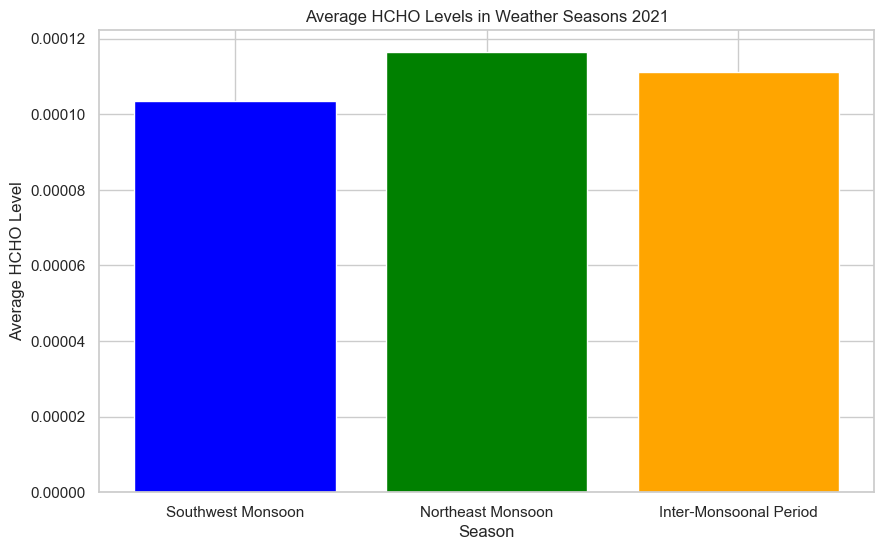

In [78]:
#Plot the average HCHO levels for each season
seasons = ['Southwest Monsoon', 'Northeast Monsoon', 'Inter-Monsoonal Period']
avg_levels = [southwest_monsoon_avg_2022, northeast_monsoon_avg_2022, inter_monsoonal_avg_2022]

plt.figure(figsize=(10, 6))
plt.bar(seasons, avg_levels, color=['blue', 'green', 'orange'])
plt.title('Average HCHO Levels in Weather Seasons 2021')
plt.xlabel('Season')
plt.ylabel('Average HCHO Level')
plt.show()